预测Titanic乘客逃生

In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
from patsy import dmatrices # 可根据离散变量自动生成哑变量
from sklearn.linear_model import LogisticRegression # sk-learn库Logistic Regression模型
from sklearn.model_selection import train_test_split, cross_val_score # sk-learn库训练与测试
from sklearn import metrics # 生成各项测试指标库
import matplotlib.pyplot as plt # 画图常用库

从../input/train.csv读入数据

In [2]:
data = pd.read_csv('train.csv')

删除不需要的列以及含有NA值的行

In [3]:
#embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
data = data.drop(['Ticket', 'Cabin'], axis = 1)
data = data.dropna()

In [4]:
len(data.index)

712

观察逃生人数与未逃生人数

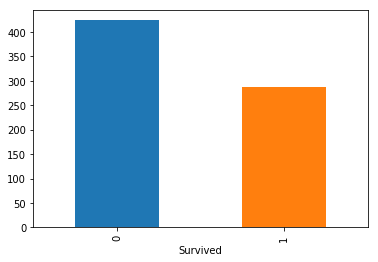

In [5]:
data.Survived.value_counts().plot(kind='bar')
plt.xlabel('Survived')
plt.show()

观察女性逃生人数

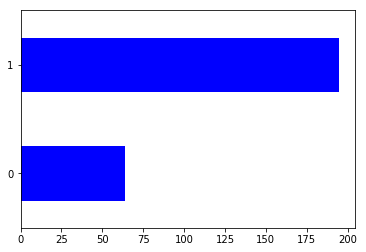

In [6]:
female = data.Survived[data.Sex == 'female'].value_counts().sort_index()
female.plot(kind='barh', color='blue', label='Female')
plt.show()

观察男性逃生人数

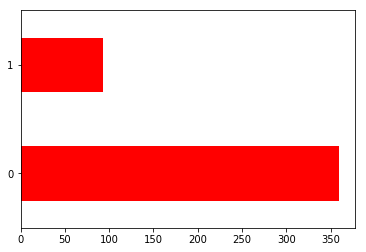

In [7]:
male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
male.plot(kind='barh',label='Male', color='red')
plt.show()

观察非低等舱逃生情况

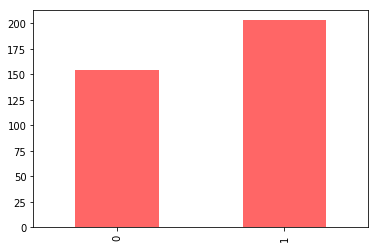

In [8]:
highclass = data.Survived[data.Pclass != 3].value_counts().sort_index()
highclass.plot(kind='bar',label='Highclass', color='red', alpha=0.6)
plt.show()

观察低等舱逃生情况

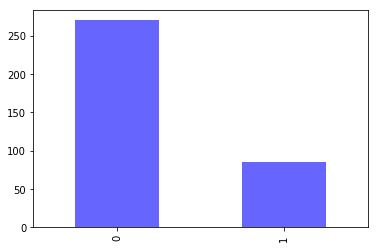

In [9]:
lowclass = data.Survived[data.Pclass == 3].value_counts().sort_index()
lowclass.plot(kind='bar',label='Highclass', color='Blue', alpha=0.6)
plt.show()

dmatrices将数据中的离散变量变成哑变量，并指明用Pclass, Sex, Embarked来预测Survived

In [10]:
y, X = dmatrices('Survived~ C(Pclass) + C(Sex) + Age + C(Embarked)', data = data, return_type='dataframe')
y = np.ravel(y)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

输出训练准确率

In [13]:
model.score(X, y)

0.7935393258426966

输出空模型的正确率：空模型预测所有人都未逃生

In [14]:
1 - y.mean()

0.5955056179775281

观察模型系数，即每种因素对于预测逃生的重要性

In [15]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

0                        1
0         Intercept     [1.7146144391454305]
1    C(Pclass)[T.2]    [-0.8796488899193657]
2    C(Pclass)[T.3]    [-2.0750167332367195]
3    C(Sex)[T.male]    [-2.3246854059229527]
4  C(Embarked)[T.Q]    [-0.5866266183669434]
5  C(Embarked)[T.S]   [-0.42050534661112304]
6               Age  [-0.029619834454675236]

对测试数据生成预测

In [16]:
test_data = pd.read_csv('test.csv')

In [17]:
test_data['Survived'] = 1

In [18]:
ytest, Xtest = dmatrices('Survived~ C(Pclass) + C(Sex) + Age + C(Embarked)', data = data, return_type='dataframe')

In [19]:
pred = model.predict(Xtest).astype(int)
solution = pd.DataFrame(list(zip(test_data['PassengerId'], pred)), columns=['PassengerID', 'Survived'])

In [20]:
solution.to_csv('./my_prediction.csv', index = False)